In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
bank=pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\LogisticRegression\bank-full_rev1.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank[bank.duplicated()].shape

(0, 17)

In [7]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
bank.shape

(45211, 17)

In [9]:
count_no_sub = len(bank[bank['y']=='no'])
count_sub = len(bank[bank['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


In [10]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
bank.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [12]:
bank.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [13]:
bank.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


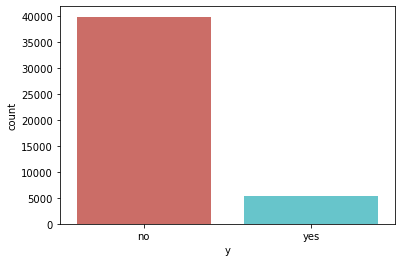

In [14]:
sns.countplot(x='y',data=bank, palette='hls')
plt.show()

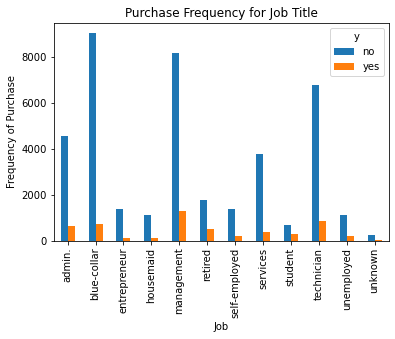

In [15]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [16]:
#The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

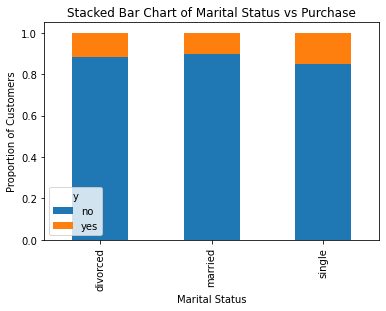

In [17]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [18]:
#The marital status does not seem a strong predictor for the outcome variable.

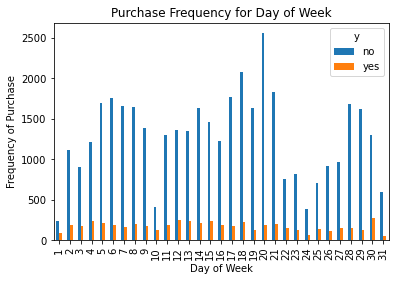

In [19]:
pd.crosstab(bank.day,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [20]:
#Day  may not be a good predictor of the outcome.

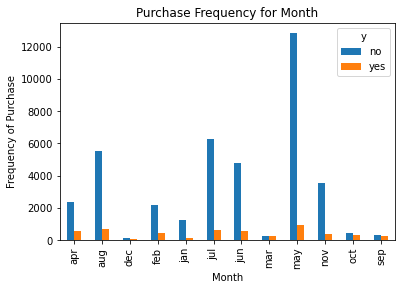

In [21]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [22]:
#Month might be a good predictor of the outcome variable.

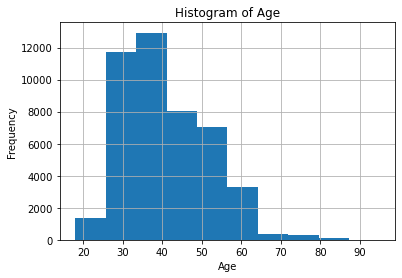

In [23]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [24]:
#Most of the customers of the bank in this dataset are in the age range of 25–40.

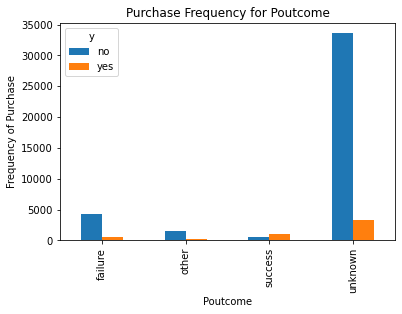

In [25]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [26]:
#Poutcome seems to be a good predictor of the outcome variable.

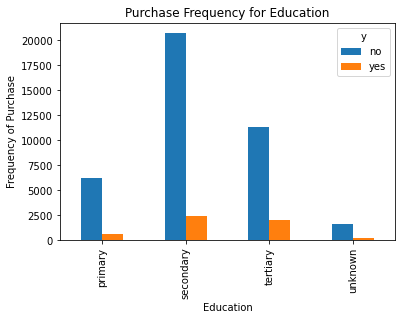

In [27]:
pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [28]:
#Education seems to be a good predictor of the outcome variable.

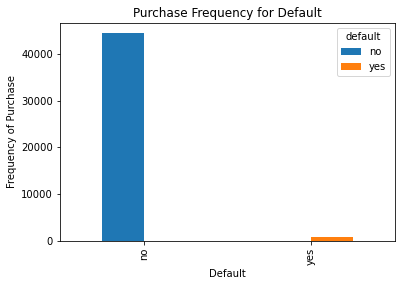

In [29]:
pd.crosstab(bank.default,bank.default).plot(kind='bar')
plt.title('Purchase Frequency for Default')
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [30]:
#Default seems to be not a good predictor of the outcome variable.

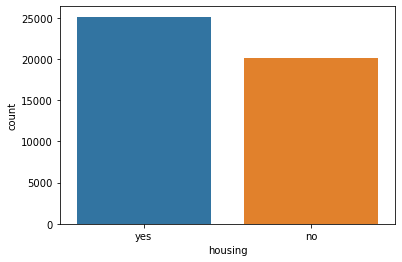

In [31]:
sns.countplot(x="housing", data=bank)
plt.show()

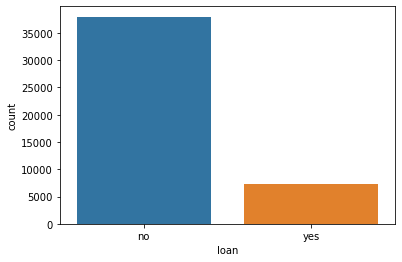

In [32]:
sns.countplot(x="loan", data=bank)
plt.show()

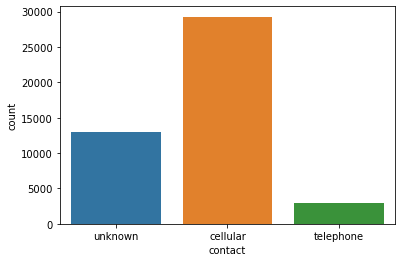

In [33]:
sns.countplot(x="contact", data=bank)
plt.show()

In [34]:
bank2=bank.drop(['default','day','poutcome','marital'],axis=1)

In [35]:
bank2.head()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,58,management,tertiary,2143,yes,no,unknown,may,261,1,-1,0,no
1,44,technician,secondary,29,yes,no,unknown,may,151,1,-1,0,no
2,33,entrepreneur,secondary,2,yes,yes,unknown,may,76,1,-1,0,no
3,47,blue-collar,unknown,1506,yes,no,unknown,may,92,1,-1,0,no
4,33,unknown,unknown,1,no,no,unknown,may,198,1,-1,0,no


In [36]:
bank2[bank2.duplicated()].shape

(1, 13)

In [37]:
bank2[bank2.duplicated()]

,age,job,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
23913,33,management,tertiary,0,no,no,cellular,aug,60,2,-1,0,no


In [38]:
data_cleaned1=bank2.drop_duplicates()
#page link for Categorical variable to numeric. https://pbpython.com/categorical-encoding.html

In [39]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        45210 non-null  object
 2   education  45210 non-null  object
 3   balance    45210 non-null  int64 
 4   housing    45210 non-null  object
 5   loan       45210 non-null  object
 6   contact    45210 non-null  object
 7   month      45210 non-null  object
 8   duration   45210 non-null  int64 
 9   campaign   45210 non-null  int64 
 10  pdays      45210 non-null  int64 
 11  previous   45210 non-null  int64 
 12  y          45210 non-null  object
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


In [40]:
data1=pd.get_dummies(data_cleaned1)

In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45210 non-null  int64
 1   balance              45210 non-null  int64
 2   duration             45210 non-null  int64
 3   campaign             45210 non-null  int64
 4   pdays                45210 non-null  int64
 5   previous             45210 non-null  int64
 6   job_admin.           45210 non-null  uint8
 7   job_blue-collar      45210 non-null  uint8
 8   job_entrepreneur     45210 non-null  uint8
 9   job_housemaid        45210 non-null  uint8
 10  job_management       45210 non-null  uint8
 11  job_retired          45210 non-null  uint8
 12  job_self-employed    45210 non-null  uint8
 13  job_services         45210 non-null  uint8
 14  job_student          45210 non-null  uint8
 15  job_technician       45210 non-null  uint8
 16  job_unemployed       4

In [48]:
x=data1.iloc[:,:-2]
y=data1.iloc[:,-1]
x

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,261,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,76,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,92,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,198,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,456,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,1127,5,184,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,508,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Givingn name to regression
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [51]:
y_pred_df=pd.DataFrame({'actual':y,'predicted_Value':classifier.predict(x)})

In [52]:
y_pred_df

,actual,predicted_Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,0
45209,0,0


In [ ]:
#confusion matrix for the model accuracy

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39267   654]
 [ 4338   951]]


In [55]:
(39267+951)/(39267+654+4338+951)

0.8895819508958195

In [56]:
#ROC curve

Text(0, 0.5, 'True Positive rate')

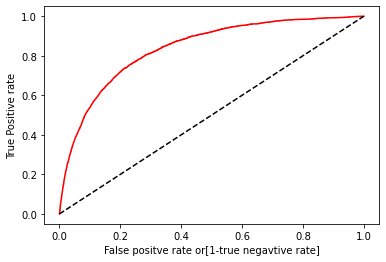

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit moodel(area=%.2f))'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positve rate or[1-true negavtive rate]')
plt.ylabel('True Positive rate')

In [58]:
auc

0.5817123958786272